<a href="https://colab.research.google.com/github/JorgeAccardi/auscultacion-presa/blob/main/Analisis_Puntos_Fijos_MI_MD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

En esta sección se importan las librerías necesarias y se cargan los archivos CSV correspondientes a los puntos fijos de Márgen Izquierda (MI) y Márgen Derecha (MD).  
Asegúrate de ajustar las rutas de los archivos si es necesario.

Se muestran las primeras filas y la información básica de ambos DataFrames para verificar la correcta carga y estructura de los datos.

In [1]:
# Importa pandas
import pandas as pd

# Carga los archivos CSV (ajusta el nombre de archivo si es necesario)
df_mi = pd.read_csv('/content/PuntosFijosMI_20250611.csv')
df_md = pd.read_csv('/content/PuntosFijosMD_20250611.csv')

# Carga los archivos XLSX (ajusta el nombre de archivo si es necesario)
#df_mi = pd.read_excel('/content/PuntosFijosMI_20250611.xlsx')
#df_md = pd.read_excel('/content/PuntosFijosMD_20250611.xlsx')

# Muestra las primeras filas de cada DataFrame
print("Primeras filas de PuntosFijosMI:")
display(df_mi.head())

print("Primeras filas de PuntosFijosMD:")
display(df_md.head())

# Muestra información básica de ambos DataFrames
print("Información de PuntosFijosMI:")
df_mi.info()

print("Información de PuntosFijosMD:")
df_md.info()

Primeras filas de PuntosFijosMI:


,FECHA,MARGEN,INSTRUMENTO,DELTA_NORTE_[M],DELTA_ESTE_[M],DELTA_COTA_[M],DISTANCIA_[M],DISTANCIA_(MM),AZIMUT_REF._AL_NORTE,TASA_NORTE_(MM/DIA),TASA_ESTE_(MM/DIA),TASA_COTA_(MM/DIA),TASA_DISTANCIA_(MM/DIA)
0,06/10/2021,Izquierda,PF01,-0.001,-0.002,0.001333,0.002236,2.236068,243.434949,-0.100000,-0.200000,0.133333,0.223607
1,10/10/2021,Izquierda,PF01,-0.008,0.003,0.000333,0.008544,8.544004,159.443955,-0.571429,0.214286,0.023810,0.610286
2,19/10/2021,Izquierda,PF01,-0.012,0.004,0.001333,0.012649,12.649111,161.565051,-0.521739,0.173913,0.057971,0.549961
3,28/10/2021,Izquierda,PF01,0.001,0.001,-0.000667,0.001414,1.414214,45.000000,0.031250,0.031250,-0.020833,0.044194
4,02/11/2021,Izquierda,PF01,-0.007,0.004,-0.002667,0.008062,8.062258,150.255119,-0.189189,0.108108,-0.072072,0.217899


Primeras filas de PuntosFijosMD:


,FECHA,MARGEN,INSTRUMENTO,DELTA_NORTE_[M],DELTA_ESTE_[M],DELTA_COTA_[M],DISTANCIA_[M],DISTANCIA_(MM),AZIMUT_REF._AL_NORTE,TASA_NORTE_(MM/DIA),TASA_ESTE_(MM/DIA),TASA_COTA_(MM/DIA),TASA_DISTANCIA_(MM/DIA)
0,04/10/2021,Derecha,PF01 PRIMA,0.000333,-0.000667,0.003333,0.000745,0.745356,296.565051,0.041667,-0.083333,0.416667,0.093169
1,10/10/2021,Derecha,PF01 PRIMA,-0.000667,-0.000667,0.004333,0.000943,0.942809,225.000000,-0.047619,-0.047619,0.309524,0.067344
2,14/10/2021,Derecha,PF01 PRIMA,0.003333,0.003333,0.003333,0.004714,4.714045,45.000000,0.185185,0.185185,0.185185,0.261891
3,18/10/2021,Derecha,PF01 PRIMA,0.002333,0.002333,0.000333,0.003300,3.299832,45.000000,0.106061,0.106061,0.015152,0.149992
4,27/10/2021,Derecha,PF01 PRIMA,-0.000667,-0.000667,0.005333,0.000943,0.942809,225.000000,-0.021505,-0.021505,0.172043,0.030413


Información de PuntosFijosMI:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FECHA                    4071 non-null   object 
 1   MARGEN                   4071 non-null   object 
 2   INSTRUMENTO              4071 non-null   object 
 3   DELTA_NORTE_[M]          2157 non-null   float64
 4   DELTA_ESTE_[M]           2727 non-null   float64
 5   DELTA_COTA_[M]           2727 non-null   float64
 6   DISTANCIA_[M]            2727 non-null   float64
 7   DISTANCIA_(MM)           2582 non-null   float64
 8   AZIMUT_REF._AL_NORTE     2723 non-null   float64
 9   TASA_NORTE_(MM/DIA)      2157 non-null   float64
 10  TASA_ESTE_(MM/DIA)       2727 non-null   float64
 11  TASA_COTA_(MM/DIA)       2727 non-null   float64
 12  TASA_DISTANCIA_(MM/DIA)  2727 non-null   float64
dtypes: float64(10), object(3)
memory usage: 413.6+ K

# Limpieza de Valores NaN por Interpolación Lineal

Antes de realizar el análisis de tendencias y otros estudios sobre las variables monitoreadas, es fundamental asegurar que los datos sean lo más completos y consistentes posible. Por ello, en este paso **limpiamos los valores nulos (NaN) en las variables numéricas** usando **interpolación lineal**.

La interpolación lineal "rellena" los valores faltantes estimando cada punto como una línea recta entre los valores válidos anterior y posterior, lo cual es especialmente adecuado para series temporales.

**¿Qué se hace aquí?**
- Se identifican todas las variables numéricas con valores faltantes.
- Se reemplazan los NaN por valores interpolados de manera lineal, tanto hacia adelante como hacia atrás (para cubrir vacíos al inicio o final de la serie).
- Las columnas de fechas y de identificación (puntos fijos, margen) no se modifican.

> Esto asegura que los análisis futuros se basen en datos completos y evita sesgos o errores asociados a huecos en la información.

---

In [2]:
# Limpieza de valores NaN por interpolación lineal en Márgen Izquierda (MI) y Márgen Derecha (MD)

import pandas as pd

# --- Márgen Izquierda (MI) ---
df_mi = df_mi.copy()
cols_numericas = df_mi.select_dtypes(include='number').columns
df_mi[cols_numericas] = df_mi[cols_numericas].interpolate(method='linear', limit_direction='both')

# --- Márgen Derecha (MD) ---
df_md = df_md.copy()
cols_numericas = df_md.select_dtypes(include='number').columns
df_md[cols_numericas] = df_md[cols_numericas].interpolate(method='linear', limit_direction='both')

# Instalación de dependencias

A continuación se instalan y configuran las dependencias necesarias para la visualización interactiva:  
- **ipywidgets:** Para controles interactivos en el notebook.  
- **plotly:** Para gráficos dinámicos y exportables.  
- **kaleido:** Para exportar gráficos en diferentes formatos (PNG, PDF, SVG, etc).  
Además, se habilita el gestor de widgets para Google Colab.

In [5]:
%pip install ipywidgets plotly
from google.colab import output as colab_output
colab_output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00


In [4]:
%pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00


# Visualización interactiva – Puntos Fijos Márgen Izquierda (MI)

Esta sección permite explorar y graficar de forma interactiva los datos de los puntos fijos del Márgen Izquierda (MI).

**¿Qué puedes hacer aquí?**
- Seleccionar la variable a graficar, el punto fijo, el año, estilos de gráfico y colores.
- Personalizar el tamaño y grosor de las líneas.
- Visualizar el gráfico dinámicamente.
- Exportar la gráfica en diferentes formatos (PNG, PDF, SVG, HTML, etc).

Utiliza los selectores y botones para interactuar con los datos y exportar tus resultados.

In [6]:
# === VISUALIZACIÓN INTERACTIVA PARA PUNTOS FIJOS MÁRGEN IZQUIERDA (MI) ===

import pandas as pd

try:
    import plotly.graph_objects as go
    import plotly.colors as pc
    import ipywidgets as widgets
    from IPython.display import display, clear_output, HTML
    import importlib.util
    import os
except ImportError:
    raise ImportError("Ejecuta: pip install plotly ipywidgets")

# ---- ADAPTA AQUÍ EL DATAFRAME A UTILIZAR ----
df = df_mi.copy()  # Asegúrate de tener df_mi cargado
titulo_dataset = "Puntos Fijos Márgen Izquierda (MI)"

try:
    df
except NameError:
    print("❌ La variable 'df' no está definida. Por favor, ejecuta primero la carga de datos.")
else:
    df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
    columnas_excluidas = ['FECHA', 'INSTRUMENTO', 'MARGEN']
    variables = [col for col in df.select_dtypes(include='number').columns if col not in columnas_excluidas]
    puntos_fijos = sorted(df['INSTRUMENTO'].dropna().unique())
    opciones_puntos = ["Todos"] + list(puntos_fijos)

    anios = sorted(df['FECHA'].dt.year.dropna().unique())
    opciones_anios = ["Todos"] + [str(a) for a in anios]

    estilos_grafico = [
        "Curvas suaves (spline)",
        "Líneas rectas",
        "Puntos",
        "Líneas + Puntos",
        "Área apilada",
        "Área + Líneas",
        "Área + Líneas + Puntos"
    ]

    tamanios_imagen = {
        "Pequeño (600x400)": (600, 400),
        "Mediano (900x500)": (900, 500),
        "Grande (1200x700)": (1200, 700),
        "Extra grande (1600x1000)": (1600, 1000)
    }

    grosores = {
        "Fino (1px)": 1,
        "Normal (2px)": 2,
        "Medio (4px)": 4,
        "Grueso (7px)": 7,
        "Extra grueso (10px)": 10
    }

    paletas = {
        "Plotly": pc.qualitative.Plotly,
        "D3": pc.qualitative.D3,
        "Viridis": pc.sequential.Viridis,
        "Cividis": pc.sequential.Cividis,
        "Inferno": pc.sequential.Inferno,
        "Pastel": pc.qualitative.Pastel,
        "Bold": pc.qualitative.Bold,
        "Set1": pc.qualitative.Set1,
        "Dark2": pc.qualitative.Dark2
    }

    punto_dropdown = widgets.Dropdown(
        options=opciones_puntos,
        value="Todos",
        description="Punto Fijo:"
    )
    variable_dropdown = widgets.Dropdown(options=variables, description="Variable:")
    estilo_dropdown = widgets.Dropdown(
        options=estilos_grafico,
        value="Curvas suaves (spline)",
        description="Estilo gráfica:"
    )
    anio_dropdown = widgets.Dropdown(
        options=opciones_anios,
        value="Todos",
        description="Año:"
    )
    tamanio_dropdown = widgets.Dropdown(
        options=list(tamanios_imagen.keys()),
        value="Mediano (900x500)",
        description="Tamaño:"
    )
    grosor_dropdown = widgets.Dropdown(
        options=list(grosores.keys()),
        value="Normal (2px)",
        description="Grosor línea:"
    )
    paleta_dropdown = widgets.Dropdown(
        options=list(paletas.keys()),
        value="Plotly",
        description="Paleta colores:"
    )
    boton = widgets.Button(description="Graficar", button_style="success")
    output = widgets.Output()
    output_guardar = widgets.Output()

    # ---------- BLOQUE PARA GUARDAR LA GRÁFICA -------------
    formatos = {
        "PNG": ".png",
        "JPEG": ".jpg",
        "SVG": ".svg",
        "PDF": ".pdf",
        "HTML": ".html"
    }

    formato_dropdown = widgets.Dropdown(
        options=list(formatos.keys()),
        value="PNG",
        description="Formato:"
    )
    ruta_text = widgets.Text(
        value="grafica_exportada",
        description="Ruta y nombre:",
        placeholder="ej: ./carpeta/mi_grafica"
    )
    boton_guardar = widgets.Button(description="Guardar gráfica", button_style="info")

    def guardar_grafica(b=None):
        with output_guardar:
            clear_output(wait=True)
            ext = formatos[formato_dropdown.value]
            ruta_archivo = ruta_text.value
            if not ruta_archivo.lower().endswith(ext):
                ruta_archivo += ext
            if 'fig' not in globals() or not isinstance(fig, go.Figure):
                print("❌ Primero debes generar una gráfica.")
                return
            try:
                if formato_dropdown.value in ["PNG", "JPEG", "SVG", "PDF"]:
                    if importlib.util.find_spec("kaleido") is None:
                        print("❌ Para guardar como imagen/vector/pdf, instala 'kaleido':\n%pip install -U kaleido")
                        return
                    fig.write_image(ruta_archivo, format=formato_dropdown.value.lower())
                elif formato_dropdown.value == "HTML":
                    fig.write_html(ruta_archivo)
                else:
                    print("❌ Tipo de archivo no soportado.")
                    return
            except Exception as e:
                print("❌ Error al guardar la gráfica:", e)
                return

            print(f"✅ Gráfica guardada en: {os.path.abspath(ruta_archivo)}")
            if os.path.exists(ruta_archivo):
                if 'google.colab' in str(get_ipython()):
                    from google.colab import files
                    files.download(ruta_archivo)
                else:
                    ruta_abs = os.path.abspath(ruta_archivo)
                    display(HTML(f'<a href="file://{ruta_abs}" target="_blank">Descargar archivo</a>'))

    boton_guardar.on_click(guardar_grafica)
    controles_guardar = widgets.HBox([formato_dropdown, ruta_text])

    # ---------- FIN BLOQUE GUARDADO ------------------------

    def graficar(b=None):
        global fig
        with output:
            clear_output(wait=True)
            variable = variable_dropdown.value
            estilo = estilo_dropdown.value
            punto = punto_dropdown.value
            anio = anio_dropdown.value
            ancho, alto = tamanios_imagen[tamanio_dropdown.value]
            grosor = grosores[grosor_dropdown.value]
            paleta = paletas[paleta_dropdown.value]

            df_plot = df.dropna(subset=['FECHA', 'INSTRUMENTO', variable])

            if anio != "Todos":
                df_plot = df_plot[df_plot['FECHA'].dt.year == int(anio)]
            if punto != "Todos":
                df_plot = df_plot[df_plot['INSTRUMENTO'] == punto]
            if df_plot.empty:
                print("No hay datos para graficar con la selección actual.")
                return

            fig = go.Figure()
            instrumentos = sorted(df_plot['INSTRUMENTO'].unique())
            color_map = {pf: paleta[i % len(paleta)] for i, pf in enumerate(instrumentos)}
            for pf in instrumentos:
                data_pf = df_plot[df_plot['INSTRUMENTO'] == pf]
                line_args = dict(width=grosor, color=color_map[pf])
                marker_args = dict(color=color_map[pf])
                if estilo == "Curvas suaves (spline)":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines",
                        name=pf,
                        line_shape="spline",
                        line=line_args
                    ))
                elif estilo == "Líneas rectas":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines",
                        name=pf,
                        line_shape="linear",
                        line=line_args
                    ))
                elif estilo == "Puntos":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="markers",
                        name=pf,
                        marker=marker_args
                    ))
                elif estilo == "Líneas + Puntos":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines+markers",
                        name=pf,
                        line_shape="linear",
                        line=line_args,
                        marker=marker_args
                    ))
                elif estilo == "Área apilada":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines",
                        name=pf,
                        stackgroup='one',
                        line_shape="linear",
                        line=line_args,
                        marker=marker_args
                    ))
                elif estilo == "Área + Líneas":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines",
                        name=pf,
                        fill="tozeroy",
                        line_shape="linear",
                        line=line_args,
                        marker=marker_args
                    ))
                elif estilo == "Área + Líneas + Puntos":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines+markers",
                        name=pf,
                        fill="tozeroy",
                        line_shape="linear",
                        line=line_args,
                        marker=marker_args
                    ))

            fig.update_layout(
                width=ancho,
                height=alto,
                title=f"{titulo_dataset}: {variable} en función del tiempo por Punto Fijo (PF)",
                xaxis_title="Fecha",
                yaxis_title=variable,
                legend_title="INSTRUMENTO",
                hovermode="x unified"
            )
            fig.show()

    # === TÍTULO EN NEGRITA Y GRANDE ARRIBA DE LOS SELECTORES ===
    titulo_html = f"<h2 style='color:#1866a3; margin-bottom: 5px'>{titulo_dataset}</h2>"
    display(HTML(titulo_html))

    # --- Selectores de la gráfica ---
    selectores = widgets.HBox([
        punto_dropdown, variable_dropdown, estilo_dropdown, anio_dropdown,
        tamanio_dropdown, grosor_dropdown, paleta_dropdown
    ])
    display(selectores)

    # --- Botón graficar debajo de los selectores ---
    display(boton)

    # --- Salida de la gráfica ---
    display(output)

    # --- Selectores de guardado ---
    display(controles_guardar)

    # --- Botón Guardar gráfica debajo de sus selectores ---
    display(boton_guardar)

    # --- Salida de guardado ---
    display(output_guardar)

    boton.on_click(graficar)
    boton_guardar.on_click(guardar_grafica)

Button(button_style='success', description='Graficar', style=ButtonStyle())

Output()

Button(button_style='info', description='Guardar gráfica', style=ButtonStyle())

Output()

# Visualización interactiva – Puntos Fijos Márgen Derecha (MD)

En esta sección puedes explorar visualmente los datos correspondientes a los puntos fijos del Márgen Derecha (MD).

**¿Qué opciones tienes?**
- Elegir variable, punto fijo, año y estilo de gráfico.
- Cambiar colores, tamaño y grosor de líneas.
- Visualizar, analizar y exportar tus gráficos en varios formatos.

Interactúa con los selectores y exporta las visualizaciones según tu necesidad.

In [8]:
# === VISUALIZACIÓN INTERACTIVA PARA PUNTOS FIJOS MÁRGEN DERECGA (MD) ===

import pandas as pd

try:
    import plotly.graph_objects as go
    import plotly.colors as pc
    import ipywidgets as widgets
    from IPython.display import display, clear_output, HTML
    import importlib.util
    import os
except ImportError:
    raise ImportError("Ejecuta: pip install plotly ipywidgets")

# ---- ADAPTA AQUÍ EL DATAFRAME A UTILIZAR ----
df = df_md.copy()  # Asegúrate de tener df_mi cargado
titulo_dataset = "Puntos Fijos Márgen Derecha (MD)"

try:
    df
except NameError:
    print("❌ La variable 'df' no está definida. Por favor, ejecuta primero la carga de datos.")
else:
    df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
    columnas_excluidas = ['FECHA', 'INSTRUMENTO', 'MARGEN']
    variables = [col for col in df.select_dtypes(include='number').columns if col not in columnas_excluidas]
    puntos_fijos = sorted(df['INSTRUMENTO'].dropna().unique())
    opciones_puntos = ["Todos"] + list(puntos_fijos)

    anios = sorted(df['FECHA'].dt.year.dropna().unique())
    opciones_anios = ["Todos"] + [str(a) for a in anios]

    estilos_grafico = [
        "Curvas suaves (spline)",
        "Líneas rectas",
        "Puntos",
        "Líneas + Puntos",
        "Área apilada",
        "Área + Líneas",
        "Área + Líneas + Puntos"
    ]

    tamanios_imagen = {
        "Pequeño (600x400)": (600, 400),
        "Mediano (900x500)": (900, 500),
        "Grande (1200x700)": (1200, 700),
        "Extra grande (1600x1000)": (1600, 1000)
    }

    grosores = {
        "Fino (1px)": 1,
        "Normal (2px)": 2,
        "Medio (4px)": 4,
        "Grueso (7px)": 7,
        "Extra grueso (10px)": 10
    }

    paletas = {
        "Plotly": pc.qualitative.Plotly,
        "D3": pc.qualitative.D3,
        "Viridis": pc.sequential.Viridis,
        "Cividis": pc.sequential.Cividis,
        "Inferno": pc.sequential.Inferno,
        "Pastel": pc.qualitative.Pastel,
        "Bold": pc.qualitative.Bold,
        "Set1": pc.qualitative.Set1,
        "Dark2": pc.qualitative.Dark2
    }

    punto_dropdown = widgets.Dropdown(
        options=opciones_puntos,
        value="Todos",
        description="Punto Fijo:"
    )
    variable_dropdown = widgets.Dropdown(options=variables, description="Variable:")
    estilo_dropdown = widgets.Dropdown(
        options=estilos_grafico,
        value="Curvas suaves (spline)",
        description="Estilo gráfica:"
    )
    anio_dropdown = widgets.Dropdown(
        options=opciones_anios,
        value="Todos",
        description="Año:"
    )
    tamanio_dropdown = widgets.Dropdown(
        options=list(tamanios_imagen.keys()),
        value="Mediano (900x500)",
        description="Tamaño:"
    )
    grosor_dropdown = widgets.Dropdown(
        options=list(grosores.keys()),
        value="Normal (2px)",
        description="Grosor línea:"
    )
    paleta_dropdown = widgets.Dropdown(
        options=list(paletas.keys()),
        value="Plotly",
        description="Paleta colores:"
    )
    boton = widgets.Button(description="Graficar", button_style="success")
    output = widgets.Output()
    output_guardar = widgets.Output()

    # ---------- BLOQUE PARA GUARDAR LA GRÁFICA -------------
    formatos = {
        "PNG": ".png",
        "JPEG": ".jpg",
        "SVG": ".svg",
        "PDF": ".pdf",
        "HTML": ".html"
    }

    formato_dropdown = widgets.Dropdown(
        options=list(formatos.keys()),
        value="PNG",
        description="Formato:"
    )
    ruta_text = widgets.Text(
        value="grafica_exportada",
        description="Ruta y nombre:",
        placeholder="ej: ./carpeta/mi_grafica"
    )
    boton_guardar = widgets.Button(description="Guardar gráfica", button_style="info")

    def guardar_grafica(b=None):
        with output_guardar:
            clear_output(wait=True)
            ext = formatos[formato_dropdown.value]
            ruta_archivo = ruta_text.value
            if not ruta_archivo.lower().endswith(ext):
                ruta_archivo += ext
            if 'fig' not in globals() or not isinstance(fig, go.Figure):
                print("❌ Primero debes generar una gráfica.")
                return
            try:
                if formato_dropdown.value in ["PNG", "JPEG", "SVG", "PDF"]:
                    if importlib.util.find_spec("kaleido") is None:
                        print("❌ Para guardar como imagen/vector/pdf, instala 'kaleido':\n%pip install -U kaleido")
                        return
                    fig.write_image(ruta_archivo, format=formato_dropdown.value.lower())
                elif formato_dropdown.value == "HTML":
                    fig.write_html(ruta_archivo)
                else:
                    print("❌ Tipo de archivo no soportado.")
                    return
            except Exception as e:
                print("❌ Error al guardar la gráfica:", e)
                return

            print(f"✅ Gráfica guardada en: {os.path.abspath(ruta_archivo)}")
            if os.path.exists(ruta_archivo):
                if 'google.colab' in str(get_ipython()):
                    from google.colab import files
                    files.download(ruta_archivo)
                else:
                    ruta_abs = os.path.abspath(ruta_archivo)
                    display(HTML(f'<a href="file://{ruta_abs}" target="_blank">Descargar archivo</a>'))

    boton_guardar.on_click(guardar_grafica)
    controles_guardar = widgets.HBox([formato_dropdown, ruta_text])

    # ---------- FIN BLOQUE GUARDADO ------------------------

    def graficar(b=None):
        global fig
        with output:
            clear_output(wait=True)
            variable = variable_dropdown.value
            estilo = estilo_dropdown.value
            punto = punto_dropdown.value
            anio = anio_dropdown.value
            ancho, alto = tamanios_imagen[tamanio_dropdown.value]
            grosor = grosores[grosor_dropdown.value]
            paleta = paletas[paleta_dropdown.value]

            df_plot = df.dropna(subset=['FECHA', 'INSTRUMENTO', variable])

            if anio != "Todos":
                df_plot = df_plot[df_plot['FECHA'].dt.year == int(anio)]
            if punto != "Todos":
                df_plot = df_plot[df_plot['INSTRUMENTO'] == punto]
            if df_plot.empty:
                print("No hay datos para graficar con la selección actual.")
                return

            fig = go.Figure()
            instrumentos = sorted(df_plot['INSTRUMENTO'].unique())
            color_map = {pf: paleta[i % len(paleta)] for i, pf in enumerate(instrumentos)}
            for pf in instrumentos:
                data_pf = df_plot[df_plot['INSTRUMENTO'] == pf]
                line_args = dict(width=grosor, color=color_map[pf])
                marker_args = dict(color=color_map[pf])
                if estilo == "Curvas suaves (spline)":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines",
                        name=pf,
                        line_shape="spline",
                        line=line_args
                    ))
                elif estilo == "Líneas rectas":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines",
                        name=pf,
                        line_shape="linear",
                        line=line_args
                    ))
                elif estilo == "Puntos":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="markers",
                        name=pf,
                        marker=marker_args
                    ))
                elif estilo == "Líneas + Puntos":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines+markers",
                        name=pf,
                        line_shape="linear",
                        line=line_args,
                        marker=marker_args
                    ))
                elif estilo == "Área apilada":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines",
                        name=pf,
                        stackgroup='one',
                        line_shape="linear",
                        line=line_args,
                        marker=marker_args
                    ))
                elif estilo == "Área + Líneas":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines",
                        name=pf,
                        fill="tozeroy",
                        line_shape="linear",
                        line=line_args,
                        marker=marker_args
                    ))
                elif estilo == "Área + Líneas + Puntos":
                    fig.add_trace(go.Scatter(
                        x=data_pf['FECHA'],
                        y=data_pf[variable],
                        mode="lines+markers",
                        name=pf,
                        fill="tozeroy",
                        line_shape="linear",
                        line=line_args,
                        marker=marker_args
                    ))

            fig.update_layout(
                width=ancho,
                height=alto,
                title=f"{titulo_dataset}: {variable} en función del tiempo por Punto Fijo (PF)",
                xaxis_title="Fecha",
                yaxis_title=variable,
                legend_title="INSTRUMENTO",
                hovermode="x unified"
            )
            fig.show()

    # === TÍTULO EN NEGRITA Y GRANDE ARRIBA DE LOS SELECTORES ===
    titulo_html = f"<h2 style='color:#1866a3; margin-bottom: 5px'>{titulo_dataset}</h2>"
    display(HTML(titulo_html))

    # --- Selectores de la gráfica ---
    selectores = widgets.HBox([
        punto_dropdown, variable_dropdown, estilo_dropdown, anio_dropdown,
        tamanio_dropdown, grosor_dropdown, paleta_dropdown
    ])
    display(selectores)

    # --- Botón graficar debajo de los selectores ---
    display(boton)

    # --- Salida de la gráfica ---
    display(output)

    # --- Selectores de guardado ---
    display(controles_guardar)

    # --- Botón Guardar gráfica debajo de sus selectores ---
    display(boton_guardar)

    # --- Salida de guardado ---
    display(output_guardar)

    boton.on_click(graficar)
    boton_guardar.on_click(guardar_grafica)

Button(button_style='success', description='Graficar', style=ButtonStyle())

Output()

Button(button_style='info', description='Guardar gráfica', style=ButtonStyle())

Output()

In [9]:
import pandas as pd
try:
    import plotly.graph_objects as go
    import plotly.colors as pc
    import ipywidgets as widgets
    from IPython.display import display, clear_output, HTML
    import importlib.util
    import os
except ImportError:
    raise ImportError("Ejecuta: pip install plotly ipywidgets")

# --- Verificar existencia de DataFrames ---
try:
    df_mi
    df_md
except NameError:
    print("❌ Los DataFrames 'df_mi' y 'df_md' no están definidos. Por favor, ejecuta primero el script de carga de datos.")
    df_mi = pd.DataFrame()
    df_md = pd.DataFrame()

# --- Definiciones comunes ---
estilos_grafico = [
    "Curvas suaves (spline)", "Líneas rectas", "Puntos", "Líneas + Puntos",
    "Área apilada", "Área + Líneas", "Área + Líneas + Puntos"
]

tamanios_imagen = {
    "Pequeño (600x400)": (600, 400),
    "Mediano (900x500)": (900, 500),
    "Grande (1200x700)": (1200, 700),
    "Extra grande (1600x1000)": (1600, 1000)
}

grosores = {
    "Fino (1px)": 1, "Normal (2px)": 2, "Medio (4px)": 4,
    "Grueso (7px)": 7, "Extra grueso (10px)": 10
}

paletas = {
    "Plotly": pc.qualitative.Plotly, "D3": pc.qualitative.D3,
    "Viridis": pc.sequential.Viridis, "Cividis": pc.sequential.Cividis,
    "Inferno": pc.sequential.Inferno, "Pastel": pc.qualitative.Pastel,
    "Bold": pc.qualitative.Bold, "Set1": pc.qualitative.Set1,
    "Dark2": pc.qualitative.Dark2
}

formatos = {
    "PNG": ".png", "JPEG": ".jpg", "SVG": ".svg", "PDF": ".pdf", "HTML": ".html"
}

# --- WIDGETS DE VISUALIZACIÓN ---
margen_dropdown = widgets.Dropdown(
    options=["Margen Izquierda (MI)", "Margen Derecha (MD)"],
    value="Margen Izquierda (MI)",
    description="Margen:"
)
punto_dropdown = widgets.Dropdown(description="Punto Fijo:")
variable_dropdown = widgets.Dropdown(description="Variable:")
estilo_dropdown = widgets.Dropdown(
    options=estilos_grafico,
    value="Curvas suaves (spline)",
    description="Estilo gráfica:"
)
anio_dropdown = widgets.Dropdown(description="Año:")
tamanio_dropdown = widgets.Dropdown(
    options=list(tamanios_imagen.keys()),
    value="Mediano (900x500)",
    description="Tamaño:"
)
grosor_dropdown = widgets.Dropdown(
    options=list(grosores.keys()),
    value="Normal (2px)",
    description="Grosor línea:"
)
paleta_dropdown = widgets.Dropdown(
    options=list(paletas.keys()),
    value="Plotly",
    description="Paleta colores:"
)
formato_dropdown = widgets.Dropdown(
    options=list(formatos.keys()),
    value="PNG",
    description="Formato:"
)
ruta_text = widgets.Text(
    value="grafica_exportada",
    description="Ruta y nombre:",
    placeholder="ej: ./carpeta/mi_grafica"
)
boton = widgets.Button(description="Graficar", button_style="success")
boton_guardar = widgets.Button(description="Guardar gráfica", button_style="info")
output = widgets.Output()
output_guardar = widgets.Output()

# --- Función para actualizar opciones de dropdowns ---
def actualizar_opciones(change=None):
    margen = margen_dropdown.value
    df = df_mi if margen == "Margen Izquierda (MI)" else df_md
    if df.empty:
        punto_dropdown.options = ["Ninguno"]
        variable_dropdown.options = ["Ninguna"]
        anio_dropdown.options = ["Ninguno"]
        return
    df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
    columnas_excluidas = ['FECHA', 'INSTRUMENTO', 'MARGEN']
    variables = [col for col in df.select_dtypes(include='number').columns if col not in columnas_excluidas]
    puntos_fijos = sorted(df['INSTRUMENTO'].dropna().unique())
    anios = sorted(df['FECHA'].dt.year.dropna().unique().astype(int))
    punto_dropdown.options = ["Todos"] + list(puntos_fijos)
    punto_dropdown.value = "Todos"
    variable_dropdown.options = variables if variables else ["Ninguna"]
    variable_dropdown.value = variables[0] if variables else "Ninguna"
    anio_dropdown.options = ["Todos"] + [str(a) for a in anios]
    anio_dropdown.value = "Todos"

# --- Función para graficar ---
def graficar(b=None):
    global fig
    with output:
        clear_output(wait=True)
        margen = margen_dropdown.value
        df = df_mi if margen == "Margen Izquierda (MI)" else df_md
        if df.empty:
            print(f"❌ No hay datos cargados para {margen}.")
            return
        variable = variable_dropdown.value
        if variable == "Ninguna":
            print("❌ No hay variables numéricas para graficar.")
            return
        estilo = estilo_dropdown.value
        punto = punto_dropdown.value
        anio = anio_dropdown.value
        ancho, alto = tamanios_imagen[tamanio_dropdown.value]
        grosor = grosores[grosor_dropdown.value]
        paleta = paletas[paleta_dropdown.value]
        titulo_dataset = f"Puntos Fijos {margen}"

        df_plot = df.dropna(subset=['FECHA', 'INSTRUMENTO', variable])
        if anio != "Todos":
            df_plot = df_plot[df_plot['FECHA'].dt.year == int(anio)]
        if punto != "Todos":
            df_plot = df_plot[df_plot['INSTRUMENTO'] == punto]
        if df_plot.empty:
            print("No hay datos para graficar con la selección actual.")
            return

        fig = go.Figure()
        instrumentos = sorted(df_plot['INSTRUMENTO'].unique())
        color_map = {pf: paleta[i % len(paleta)] for i, pf in enumerate(instrumentos)}
        for pf in instrumentos:
            data_pf = df_plot[df_plot['INSTRUMENTO'] == pf]
            line_args = dict(width=grosor, color=color_map[pf])
            marker_args = dict(color=color_map[pf])
            if estilo == "Curvas suaves (spline)":
                fig.add_trace(go.Scatter(
                    x=data_pf['FECHA'], y=data_pf[variable], mode="lines",
                    name=pf, line_shape="spline", line=line_args
                ))
            elif estilo == "Líneas rectas":
                fig.add_trace(go.Scatter(
                    x=data_pf['FECHA'], y=data_pf[variable], mode="lines",
                    name=pf, line_shape="linear", line=line_args
                ))
            elif estilo == "Puntos":
                fig.add_trace(go.Scatter(
                    x=data_pf['FECHA'], y=data_pf[variable], mode="markers",
                    name=pf, marker=marker_args
                ))
            elif estilo == "Líneas + Puntos":
                fig.add_trace(go.Scatter(
                    x=data_pf['FECHA'], y=data_pf[variable], mode="lines+markers",
                    name=pf, line_shape="linear", line=line_args, marker=marker_args
                ))
            elif estilo == "Área apilada":
                fig.add_trace(go.Scatter(
                    x=data_pf['FECHA'], y=data_pf[variable], mode="lines",
                    name=pf, stackgroup='one', line_shape="linear", line=line_args, marker=marker_args
                ))
            elif estilo == "Área + Líneas":
                fig.add_trace(go.Scatter(
                    x=data_pf['FECHA'], y=data_pf[variable], mode="lines",
                    name=pf, fill="tozeroy", line_shape="linear", line=line_args, marker=marker_args
                ))
            elif estilo == "Área + Líneas + Puntos":
                fig.add_trace(go.Scatter(
                    x=data_pf['FECHA'], y=data_pf[variable], mode="lines+markers",
                    name=pf, fill="tozeroy", line_shape="linear", line=line_args, marker=marker_args
                ))

        fig.update_layout(
            width=ancho, height=alto,
            title=f"{titulo_dataset}: {variable} en función del tiempo por Punto Fijo (PF)",
            xaxis_title="Fecha", yaxis_title=variable,
            legend_title="INSTRUMENTO", hovermode="x unified"
        )
        fig.show()

# --- Función para guardar gráfica ---
def guardar_grafica(b=None):
    with output_guardar:
        clear_output(wait=True)
        ext = formatos[formato_dropdown.value]
        ruta_archivo = ruta_text.value
        if not ruta_archivo.lower().endswith(ext):
            ruta_archivo += ext
        if 'fig' not in globals() or not isinstance(fig, go.Figure):
            print("❌ Primero debes generar una gráfica.")
            return
        try:
            if formato_dropdown.value in ["PNG", "JPEG", "SVG", "PDF"]:
                if importlib.util.find_spec("kaleido") is None:
                    print("❌ Para guardar como imagen/vector/pdf, instala 'kaleido':\n%pip install -U kaleido")
                    return
                fig.write_image(ruta_archivo, format=formato_dropdown.value.lower())
            elif formato_dropdown.value == "HTML":
                fig.write_html(ruta_archivo)
            else:
                print("❌ Tipo de archivo no soportado.")
                return
        except Exception as e:
            print("❌ Error al guardar la gráfica:", e)
            return
        print(f"✅ Gráfica guardada en: {os.path.abspath(ruta_archivo)}")
        if os.path.exists(ruta_archivo):
            if 'google.colab' in str(get_ipython()):
                from google.colab import files
                files.download(ruta_archivo)
            else:
                ruta_abs = os.path.abspath(ruta_archivo)
                display(HTML(f'<a href="file://{ruta_abs}" target="_blank">Descargar archivo</a>'))

# --- Configuración de eventos ---
margen_dropdown.observe(actualizar_opciones, names='value')
boton.on_click(graficar)
boton_guardar.on_click(guardar_grafica)

# --- Interfaz de usuario ---
titulo_html = "<h2 style='color:#1866a3; margin-bottom: 5px'>Visualización de Puntos Fijos</h2>"
display(HTML(titulo_html))
selectores = widgets.HBox([
    margen_dropdown, punto_dropdown, variable_dropdown, estilo_dropdown,
    anio_dropdown, tamanio_dropdown, grosor_dropdown, paleta_dropdown
])
display(selectores)
display(boton)
display(output)
controles_guardar = widgets.HBox([formato_dropdown, ruta_text])
display(controles_guardar)
display(boton_guardar)
display(output_guardar)

# --- Inicializar opciones ---
actualizar_opciones()

Button(button_style='success', description='Graficar', style=ButtonStyle())

Output()

Button(button_style='info', description='Guardar gráfica', style=ButtonStyle())

Output()

# Análisis de tendencias temporales – Márgen Izquierda (MI) (Selección Interactiva)

Utiliza los selectores a continuación para elegir la **variable** y el **punto fijo** que deseas analizar.  
Se graficará la evolución de la variable a lo largo del tiempo, junto con su línea de tendencia calculada automáticamente.

> Esto permite un análisis personalizado y evita la generación de múltiples gráficos innecesarios.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Prepara los datos ---
df = df_mi.copy()
df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
columnas_excluidas = ['FECHA', 'INSTRUMENTO', 'MARGEN']
variables = [col for col in df.select_dtypes(include='number').columns if col not in columnas_excluidas]
puntos_fijos = sorted(df['INSTRUMENTO'].dropna().unique())

# --- Crea los selectores (Punto Fijo primero, luego Variable) ---
punto_dropdown = widgets.Dropdown(
    options=puntos_fijos,
    description="Punto fijo:"
)
variable_dropdown = widgets.Dropdown(
    options=variables,
    description="Variable:"
)
boton = widgets.Button(description="Graficar tendencia", button_style="success")
output = widgets.Output()

def graficar_tendencia(b=None):
    with output:
        clear_output(wait=True)
        variable = variable_dropdown.value
        pf = punto_dropdown.value
        data_pf = df[df['INSTRUMENTO']==pf].sort_values('FECHA')
        if data_pf[variable].count() < 2:
            print("No hay suficientes datos para graficar la tendencia.")
            return
        x_fechas = data_pf['FECHA']
        x_ordinal = x_fechas.map(pd.Timestamp.toordinal).values
        y = data_pf[variable].values
        plt.figure(figsize=(10, 4))
        plt.plot(x_fechas, y, marker='o', label='Datos')
        # Línea de tendencia
        slope, intercept, r_value, p_value, std_err = linregress(x_ordinal, y)
        y_trend = intercept + slope * x_ordinal
        plt.plot(x_fechas, y_trend, color='red', linestyle='--', label=f'Tendencia (Pendiente: {slope:.3g})')
        plt.title(f'{variable} - Punto Fijo: {pf} (MI)')
        plt.xlabel('Fecha')
        plt.ylabel(variable)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        # Interpretación básica:
        if abs(slope) < 1e-3:
            print(f"Tendencia prácticamente estable (pendiente cercana a cero).")
        elif slope > 0:
            print(f"Tendencia creciente (pendiente positiva: {slope:.3g}).")
        else:
            print(f"Tendencia decreciente (pendiente negativa: {slope:.3g}).")

# Mostramos los selectores (Punto Fijo primero, luego Variable)
display(widgets.HBox([punto_dropdown, variable_dropdown, boton]))
display(output)
boton.on_click(graficar_tendencia)

Output()

# Análisis de tendencias temporales – Márgen Derecha (MD) (Selección Interactiva)

Usa los selectores para elegir la **variable** y el **punto fijo** que deseas analizar.  
Se graficará la evolución de la variable en el tiempo junto con la línea de tendencia (regresión lineal).

> Así puedes analizar el comportamiento de cada variable y punto fijo de manera personalizada en el Márgen Derecha.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Prepara los datos ---
df = df_md.copy()
df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
columnas_excluidas = ['FECHA', 'INSTRUMENTO', 'MARGEN']
variables = [col for col in df.select_dtypes(include='number').columns if col not in columnas_excluidas]
puntos_fijos = sorted(df['INSTRUMENTO'].dropna().unique())

# --- Crea los selectores (Punto Fijo primero, luego Variable) ---
punto_dropdown = widgets.Dropdown(
    options=puntos_fijos,
    description="Punto fijo:"
)
variable_dropdown = widgets.Dropdown(
    options=variables,
    description="Variable:"
)
boton = widgets.Button(description="Graficar tendencia", button_style="success")
output = widgets.Output()

def graficar_tendencia(b=None):
    with output:
        clear_output(wait=True)
        variable = variable_dropdown.value
        pf = punto_dropdown.value
        data_pf = df[df['INSTRUMENTO']==pf].sort_values('FECHA')
        if data_pf[variable].count() < 2:
            print("No hay suficientes datos para graficar la tendencia.")
            return
        x_fechas = data_pf['FECHA']
        x_ordinal = x_fechas.map(pd.Timestamp.toordinal).values
        y = data_pf[variable].values
        plt.figure(figsize=(10, 4))
        plt.plot(x_fechas, y, marker='o', label='Datos')
        # Línea de tendencia
        slope, intercept, r_value, p_value, std_err = linregress(x_ordinal, y)
        y_trend = intercept + slope * x_ordinal
        plt.plot(x_fechas, y_trend, color='red', linestyle='--', label=f'Tendencia (Pendiente: {slope:.3g})')
        plt.title(f'{variable} - Punto Fijo: {pf} (MD)')
        plt.xlabel('Fecha')
        plt.ylabel(variable)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        # Interpretación básica:
        if abs(slope) < 1e-3:
            print(f"Tendencia prácticamente estable (pendiente cercana a cero).")
        elif slope > 0:
            print(f"Tendencia creciente (pendiente positiva: {slope:.3g}).")
        else:
            print(f"Tendencia decreciente (pendiente negativa: {slope:.3g}).")

# Mostramos los selectores (Punto Fijo primero, luego Variable)
display(widgets.HBox([punto_dropdown, variable_dropdown, boton]))
display(output)
boton.on_click(graficar_tendencia)

Output()

# Análisis de Variabilidad Temporal – Márgen Izquierda (MI)

Una vez identificadas las tendencias, es fundamental analizar la **variabilidad** de las variables monitoreadas en cada punto fijo. Este análisis ayuda a comprender la estabilidad y la presencia de cambios anómalos o fluctuaciones importantes en el comportamiento temporal.

**¿Cómo se analiza la variabilidad?**
- Calculando y graficando la desviación estándar en ventanas móviles.
- Visualizando estadísticas descriptivas (mínimo, máximo, mediana, cuartiles) mediante boxplots.

> Este análisis permite detectar episodios de variabilidad inusual que podrían estar asociados a eventos relevantes en el monitoreo geotécnico.

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Prepara los datos ---
df = df_mi.copy()
df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
columnas_excluidas = ['FECHA', 'INSTRUMENTO', 'MARGEN']
variables = [col for col in df.select_dtypes(include='number').columns if col not in columnas_excluidas]
puntos_fijos = sorted(df['INSTRUMENTO'].dropna().unique())

# Selectores
punto_dropdown = widgets.Dropdown(
    options=puntos_fijos,
    description="Punto fijo:"
)
variable_dropdown = widgets.Dropdown(
    options=variables,
    description="Variable:"
)
ventana_dropdown = widgets.Dropdown(
    options=[3, 5, 7, 10, 15],
    value=5,
    description="Ventana:"
)
boton = widgets.Button(description="Graficar variabilidad", button_style="info")
output = widgets.Output()

def graficar_variabilidad(b=None):
    with output:
        clear_output(wait=True)
        variable = variable_dropdown.value
        pf = punto_dropdown.value
        ventana = ventana_dropdown.value
        data_pf = df[df['INSTRUMENTO']==pf].sort_values('FECHA')
        if data_pf[variable].count() < 2:
            print("No hay suficientes datos para analizar la variabilidad.")
            return
        # Rolling std
        rolling_std = data_pf[variable].rolling(window=ventana, center=True, min_periods=1).std()
        plt.figure(figsize=(12, 4))
        plt.plot(data_pf['FECHA'], data_pf[variable], marker='o', label='Datos')
        plt.plot(data_pf['FECHA'], rolling_std, color='orange', label=f'Desvío std (ventana={ventana})')
        plt.xlabel('Fecha')
        plt.ylabel(variable)
        plt.title(f'Variabilidad {variable} - Punto Fijo: {pf} (MI)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Boxplot
        plt.figure(figsize=(4, 5))
        plt.boxplot(data_pf[variable].dropna(), vert=True, patch_artist=True)
        plt.title(f'Boxplot {variable} - {pf} (MI)')
        plt.ylabel(variable)
        plt.show()

display(widgets.HBox([punto_dropdown, variable_dropdown, ventana_dropdown, boton]))
display(output)
boton.on_click(graficar_variabilidad)

Output()

# Análisis de Variabilidad Temporal – Márgen Derecha (MD)

Después de analizar las tendencias, es fundamental estudiar la **variabilidad** de las variables monitoreadas para cada punto fijo en el Márgen Derecha (MD). Este análisis ayuda a identificar episodios de mayor dispersión, posibles anomalías o cambios significativos en la estabilidad de las mediciones.

**¿Cómo lo hacemos?**
- Calculamos y graficamos la desviación estándar móvil en una ventana seleccionable.
- Mostramos un boxplot para visualizar la dispersión y posibles valores atípicos.

> Usa los selectores para elegir el punto fijo, la variable y el tamaño de la ventana de análisis.

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Prepara los datos ---
df = df_md.copy()
df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
columnas_excluidas = ['FECHA', 'INSTRUMENTO', 'MARGEN']
variables = [col for col in df.select_dtypes(include='number').columns if col not in columnas_excluidas]
puntos_fijos = sorted(df['INSTRUMENTO'].dropna().unique())

# Selectores
punto_dropdown = widgets.Dropdown(
    options=puntos_fijos,
    description="Punto fijo:"
)
variable_dropdown = widgets.Dropdown(
    options=variables,
    description="Variable:"
)
ventana_dropdown = widgets.Dropdown(
    options=[3, 5, 7, 10, 15],
    value=5,
    description="Ventana:"
)
boton = widgets.Button(description="Graficar variabilidad", button_style="info")
output = widgets.Output()

def graficar_variabilidad(b=None):
    with output:
        clear_output(wait=True)
        variable = variable_dropdown.value
        pf = punto_dropdown.value
        ventana = ventana_dropdown.value
        data_pf = df[df['INSTRUMENTO']==pf].sort_values('FECHA')
        if data_pf[variable].count() < 2:
            print("No hay suficientes datos para analizar la variabilidad.")
            return
        # Rolling std
        rolling_std = data_pf[variable].rolling(window=ventana, center=True, min_periods=1).std()
        plt.figure(figsize=(12, 4))
        plt.plot(data_pf['FECHA'], data_pf[variable], marker='o', label='Datos')
        plt.plot(data_pf['FECHA'], rolling_std, color='orange', label=f'Desvío std (ventana={ventana})')
        plt.xlabel('Fecha')
        plt.ylabel(variable)
        plt.title(f'Variabilidad {variable} - Punto Fijo: {pf} (MD)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Boxplot
        plt.figure(figsize=(4, 5))
        plt.boxplot(data_pf[variable].dropna(), vert=True, patch_artist=True)
        plt.title(f'Boxplot {variable} - {pf} (MD)')
        plt.ylabel(variable)
        plt.show()

display(widgets.HBox([punto_dropdown, variable_dropdown, ventana_dropdown, boton]))
display(output)
boton.on_click(graficar_variabilidad)

Output()

# Detección de Anomalías y Eventos Significativos

Para complementar el análisis de tendencia y variabilidad, es fundamental identificar mediciones inusuales (“outliers”) que pueden estar asociadas a eventos relevantes, errores instrumentales o cambios abruptos de comportamiento.

En este análisis, se resaltan los valores atípicos de cada variable y punto fijo mediante criterios estadísticos sencillos, facilitando su identificación y eventual interpretación.

---

**Instrucciones:**
- Selecciona el punto fijo y la variable de interés.
- Los valores anómalos se mostrarán resaltados en el gráfico de serie de tiempo y en el boxplot.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

df = df_mi.copy()
df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
columnas_excluidas = ['FECHA', 'INSTRUMENTO', 'MARGEN']
variables = [col for col in df.select_dtypes(include='number').columns if col not in columnas_excluidas]
puntos_fijos = sorted(df['INSTRUMENTO'].dropna().unique())

punto_dropdown = widgets.Dropdown(options=puntos_fijos, description="Punto fijo:")
variable_dropdown = widgets.Dropdown(options=variables, description="Variable:")
boton = widgets.Button(description="Detectar anomalías", button_style="warning")
output = widgets.Output()

def detectar_anomalias(b=None):
    with output:
        clear_output(wait=True)
        variable = variable_dropdown.value
        pf = punto_dropdown.value
        data_pf = df[df['INSTRUMENTO']==pf].sort_values('FECHA')
        y = data_pf[variable]
        if y.count() < 2:
            print("No hay suficientes datos.")
            return
        media = y.mean()
        std = y.std()
        # Criterio típico: valores fuera de +/- 3 std
        outliers = (np.abs(y - media) > 3*std)

        plt.figure(figsize=(12,4))
        plt.plot(data_pf['FECHA'], y, marker='o', label='Datos')
        plt.scatter(data_pf['FECHA'][outliers], y[outliers], color='red', label='Anomalías', zorder=10)
        plt.title(f'{variable} - {pf} (Anomalías en rojo)')
        plt.xlabel('Fecha')
        plt.ylabel(variable)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Boxplot con outliers resaltados
        plt.figure(figsize=(4,5))
        plt.boxplot(y.dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        plt.scatter(np.ones(sum(outliers)), y[outliers], color='red', label='Anomalías', zorder=10)
        plt.title(f'Boxplot {variable} - {pf}')
        plt.ylabel(variable)
        plt.show()

display(widgets.HBox([punto_dropdown, variable_dropdown, boton]))
display(output)
boton.on_click(detectar_anomalias)

Output()

# Detección de Anomalías y Eventos Significativos – Márgen Derecha (MD)

Identificar mediciones anómalas (“outliers”) es esencial para anticipar posibles eventos críticos, detectar errores instrumentales o analizar episodios de comportamiento atípico en el monitoreo geotécnico.

En este paso se resaltan los valores atípicos de cada variable y punto fijo utilizando criterios estadísticos estándar (fuera de ±3 desviaciones estándar respecto a la media), facilitando su identificación visual en el gráfico de serie de tiempo y en el boxplot.

**Instrucciones:**
- Selecciona el punto fijo y la variable de interés.
- Haz clic en "Detectar anomalías". Los valores anómalos aparecerán resaltados en rojo.

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

df = df_md.copy()
df['FECHA'] = pd.to_datetime(df['FECHA'], dayfirst=True, errors='coerce')
columnas_excluidas = ['FECHA', 'INSTRUMENTO', 'MARGEN']
variables = [col for col in df.select_dtypes(include='number').columns if col not in columnas_excluidas]
puntos_fijos = sorted(df['INSTRUMENTO'].dropna().unique())

punto_dropdown = widgets.Dropdown(options=puntos_fijos, description="Punto fijo:")
variable_dropdown = widgets.Dropdown(options=variables, description="Variable:")
boton = widgets.Button(description="Detectar anomalías", button_style="warning")
output = widgets.Output()

def detectar_anomalias(b=None):
    with output:
        clear_output(wait=True)
        variable = variable_dropdown.value
        pf = punto_dropdown.value
        data_pf = df[df['INSTRUMENTO']==pf].sort_values('FECHA')
        y = data_pf[variable]
        if y.count() < 2:
            print("No hay suficientes datos.")
            return
        media = y.mean()
        std = y.std()
        # Criterio típico: valores fuera de +/- 3 std
        outliers = (np.abs(y - media) > 3*std)

        plt.figure(figsize=(12,4))
        plt.plot(data_pf['FECHA'], y, marker='o', label='Datos')
        plt.scatter(data_pf['FECHA'][outliers], y[outliers], color='red', label='Anomalías', zorder=10)
        plt.title(f'{variable} - {pf} (Anomalías en rojo)')
        plt.xlabel('Fecha')
        plt.ylabel(variable)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Boxplot con outliers resaltados
        plt.figure(figsize=(4,5))
        plt.boxplot(y.dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        plt.scatter(np.ones(sum(outliers)), y[outliers], color='red', label='Anomalías', zorder=10)
        plt.title(f'Boxplot {variable} - {pf}')
        plt.ylabel(variable)
        plt.show()

display(widgets.HBox([punto_dropdown, variable_dropdown, boton]))
display(output)
boton.on_click(detectar_anomalias)

Output()

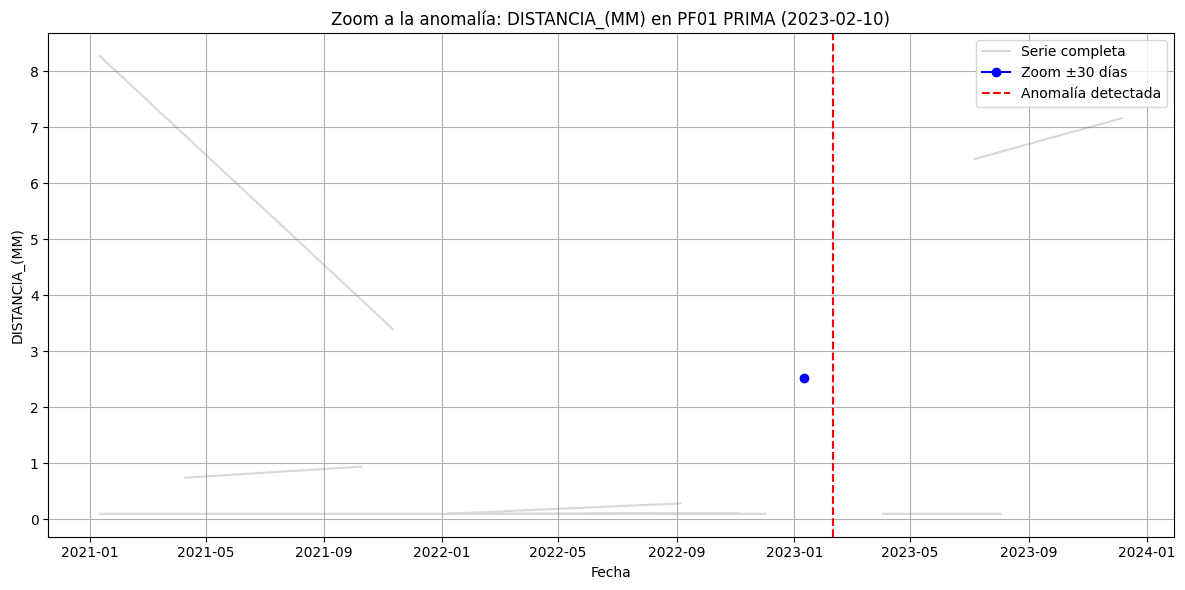

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN DEL USUARIO ---
punto = "PF01 PRIMA"  # Cambia por el punto exacto
fecha_anomalia = pd.Timestamp("2023-02-10")  # Cambia por fecha específica
ventana = 30  # Días antes y después para el zoom

# --- PREPARAR DATOS ---
data_pf = df_md[df_md['INSTRUMENTO'].str.strip() == punto].copy()
data_pf['FECHA'] = pd.to_datetime(data_pf['FECHA'], errors='coerce')
data_pf.columns = data_pf.columns.str.strip()

# Asigna la columna de distancia preferida
col_dist = None
if 'DISTANCIA_(MM)' in data_pf.columns:
    col_dist = 'DISTANCIA_(MM)'
elif 'DISTANCIA_[M]' in data_pf.columns:
    col_dist = 'DISTANCIA_[M]'
else:
    print("No se encontró una columna de distancia reconocida. Las columnas disponibles son:")
    print(data_pf.columns.tolist())
    raise Exception("Corrige el nombre de la columna de distancia en el script.")

# --- MÁSCARA TEMPORAL ---
mask = (
    (data_pf['FECHA'] >= fecha_anomalia - pd.Timedelta(days=ventana)) &
    (data_pf['FECHA'] <= fecha_anomalia + pd.Timedelta(days=ventana))
)

# --- GRAFICADO ---
plt.figure(figsize=(12, 6))
plt.plot(data_pf['FECHA'], data_pf[col_dist], label='Serie completa', alpha=0.3, color='grey')
plt.plot(
    data_pf['FECHA'][mask],
    data_pf[col_dist][mask],
    marker='o', color='blue', label=f'Zoom ±{ventana} días'
)
plt.axvline(fecha_anomalia, color='red', linestyle='--', label='Anomalía detectada')
plt.xlabel('Fecha')
plt.ylabel(col_dist)
plt.title(f'Zoom a la anomalía: {col_dist} en {punto} ({fecha_anomalia.date()})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_mi = df_mi[df_mi['FECHA'].notna()]
df_md = df_md[df_md['FECHA'].notna()]

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- PREPARA LOS DATAFRAMES ---
df_mi = df_mi.copy()
df_md = df_md.copy()
df_mi['FECHA'] = pd.to_datetime(df_mi['FECHA'], errors='coerce')
df_md['FECHA'] = pd.to_datetime(df_md['FECHA'], errors='coerce')
df_mi.columns = df_mi.columns.str.strip()
df_md.columns = df_md.columns.str.strip()

# --- VARIABLES DISPONIBLES ---
variables_mi = [col for col in df_mi.select_dtypes(include='number').columns if col not in ['FECHA']]
variables_md = [col for col in df_md.select_dtypes(include='number').columns if col not in ['FECHA']]
puntos_mi = sorted(df_mi['INSTRUMENTO'].dropna().unique())
puntos_md = sorted(df_md['INSTRUMENTO'].dropna().unique())

# --- WIDGETS ---
margen_selector = widgets.Dropdown(options=['MI', 'MD'], description='MARGEN:')
punto_selector = widgets.Dropdown(options=puntos_mi, description='Punto fijo:')
variable_selector = widgets.Dropdown(options=variables_mi, description='Variable:')
output = widgets.Output()

def update_punto_variable(*args):
    if margen_selector.value == 'MI':
        punto_selector.options = puntos_mi
        variable_selector.options = variables_mi
    else:
        punto_selector.options = puntos_md
        variable_selector.options = variables_md
margen_selector.observe(update_punto_variable, names='value')

def mostrar_tabla_variacion(b=None):
    with output:
        clear_output(wait=True)
        margen = margen_selector.value
        punto = punto_selector.value
        variable = variable_selector.value

        df = df_mi.copy() if margen == 'MI' else df_md.copy()
        datos = df[df['INSTRUMENTO']==punto].sort_values('FECHA').copy()
        datos['valor_anterior'] = datos[variable].shift(1)
        datos['delta'] = datos[variable] - datos['valor_anterior']

        # Alarma para DISTANCIA_(MM)
        if variable.upper().replace(" ","") in ['DISTANCIA_(MM)', 'DISTANCIA(MM)']:
            datos['ALARMA'] = np.where(datos['delta'].abs() > 10, '⚠️', '')
        else:
            datos['ALARMA'] = ''

        # Mostrar tabla relevante
        cols = ['FECHA', variable, 'valor_anterior', 'delta', 'ALARMA']
        print(f"Margen: {margen} | Punto: {punto} | Variable: {variable}")
        display(datos[cols].reset_index(drop=True))

boton = widgets.Button(description="Ver variación", button_style="primary")
boton.on_click(mostrar_tabla_variacion)

display(widgets.HBox([margen_selector, punto_selector, variable_selector, boton]))
display(output)

Output()

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from io import BytesIO
import base64

# --- PREPARA LOS DATAFRAMES ---
df_mi = df_mi.copy()
df_md = df_md.copy()
df_mi['FECHA'] = pd.to_datetime(df_mi['FECHA'], errors='coerce')
df_md['FECHA'] = pd.to_datetime(df_md['FECHA'], errors='coerce')
df_mi.columns = df_mi.columns.str.strip()
df_md.columns = df_md.columns.str.strip()

# --- VARIABLES DISPONIBLES ---
variables_mi = [col for col in df_mi.select_dtypes(include='number').columns if col not in ['FECHA']]
variables_md = [col for col in df_md.select_dtypes(include='number').columns if col not in ['FECHA']]
puntos_mi = sorted(df_mi['INSTRUMENTO'].dropna().unique())
puntos_md = sorted(df_md['INSTRUMENTO'].dropna().unique())

# --- WIDGETS ---
margen_selector = widgets.Dropdown(options=['MI', 'MD'], description='MARGEN:')
punto_selector = widgets.Dropdown(options=puntos_mi, description='Punto fijo:')
variable_selector = widgets.Dropdown(options=variables_mi, description='Variable:')
boton = widgets.Button(description="Ver variación", button_style="primary")
exportar_boton = widgets.Button(description="Exportar a Excel", button_style="success")
output = widgets.Output()
output_excel = widgets.Output()

tabla_resultado = None  # variable global para exportación

def update_punto_variable(*args):
    if margen_selector.value == 'MI':
        punto_selector.options = puntos_mi
        variable_selector.options = variables_mi
    else:
        punto_selector.options = puntos_md
        variable_selector.options = variables_md
margen_selector.observe(update_punto_variable, names='value')

def mostrar_tabla_variacion(b=None):
    global tabla_resultado
    with output:
        clear_output(wait=True)
        margen = margen_selector.value
        punto = punto_selector.value
        variable = variable_selector.value
        df = df_mi.copy() if margen == 'MI' else df_md.copy()
        datos = df[df['INSTRUMENTO']==punto].sort_values('FECHA').copy()

        # Ajuste de NaT en FECHA: forward fill, luego back fill si quedaron al principio
        datos['FECHA'] = datos['FECHA'].fillna(method='ffill').fillna(method='bfill')

        datos['valor_anterior'] = datos[variable].shift(1)
        datos['delta'] = datos[variable] - datos['valor_anterior']

        # Alarma para DISTANCIA_(MM)
        if variable.upper().replace(" ","") in ['DISTANCIA_(MM)', 'DISTANCIA(MM)']:
            datos['ALARMA'] = np.where(datos['delta'].abs() > 10, '⚠️', '')
        else:
            datos['ALARMA'] = ''

        # Tabla relevante
        cols = ['FECHA', variable, 'valor_anterior', 'delta', 'ALARMA']
        tabla_resultado = datos[cols].reset_index(drop=True)
        print(f"Margen: {margen} | Punto: {punto} | Variable: {variable}")
        display(tabla_resultado)

        # --- GRAFICO ---
        plt.figure(figsize=(12,4))
        plt.plot(tabla_resultado['FECHA'], tabla_resultado[variable], label='Valor', marker='o', color='royalblue')
        plt.plot(tabla_resultado['FECHA'], tabla_resultado['valor_anterior'], label='Anterior', linestyle='--', color='gray')
        plt.xlabel("Fecha")
        plt.ylabel(variable)
        plt.title(f'Evolución de {variable} y variaciones\nPunto: {punto} - Margen: {margen}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Gráfico de delta
        plt.figure(figsize=(12,3))
        plt.plot(tabla_resultado['FECHA'], tabla_resultado['delta'], marker='o', color='purple', label='Delta')
        if 'ALARMA' in tabla_resultado.columns and tabla_resultado['ALARMA'].eq('⚠️').any():
            plt.scatter(
                tabla_resultado.loc[tabla_resultado['ALARMA']=='⚠️', 'FECHA'],
                tabla_resultado.loc[tabla_resultado['ALARMA']=='⚠️', 'delta'],
                color='red', label='Alarma (>10 mm)', zorder=5, s=60
            )
        plt.axhline(0, color='gray', linestyle=':')
        plt.xlabel("Fecha")
        plt.ylabel("Delta")
        plt.title(f'Variación respecto a lectura anterior ({variable})')
        plt.legend()
        plt.tight_layout()
        plt.show()

def exportar_a_excel(b):
    with output_excel:
        clear_output(wait=True)
        global tabla_resultado
        if tabla_resultado is None or tabla_resultado.empty:
            print("Primero genera la tabla con 'Ver variación'")
            return
        # Exportar a Excel en memoria y generar link de descarga
        buffer = BytesIO()
        tabla_resultado.to_excel(buffer, index=False)
        buffer.seek(0)
        b64 = base64.b64encode(buffer.read()).decode()
        href = f'<a download="variacion_por_punto.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{b64}">Descargar Excel</a>'
        display(widgets.HTML(value=href))

boton.on_click(mostrar_tabla_variacion)
exportar_boton.on_click(exportar_a_excel)

display(widgets.HBox([margen_selector, punto_selector, variable_selector, boton, exportar_boton]))
display(output)
display(output_excel)

Output()

Output()

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- PREPARA LOS DATAFRAMES ---
df_mi = df_mi.copy()
df_md = df_md.copy()
df_mi['FECHA'] = pd.to_datetime(df_mi['FECHA'], errors='coerce')
df_md['FECHA'] = pd.to_datetime(df_md['FECHA'], errors='coerce')

# ELIMINA FILAS CON FECHA NaT
df_mi = df_mi[df_mi['FECHA'].notna()]
df_md = df_md[df_md['FECHA'].notna()]

df_mi.columns = df_mi.columns.str.strip()
df_md.columns = df_md.columns.str.strip()

# --- VARIABLES DISPONIBLES ---
variables_mi = [col for col in df_mi.select_dtypes(include='number').columns if col not in ['FECHA']]
variables_md = [col for col in df_md.select_dtypes(include='number').columns if col not in ['FECHA']]
puntos_mi = sorted(df_mi['INSTRUMENTO'].dropna().unique())
puntos_md = sorted(df_md['INSTRUMENTO'].dropna().unique())

# --- WIDGETS ---
margen_selector = widgets.Dropdown(options=['MI', 'MD'], description='MARGEN:')
punto_selector = widgets.Dropdown(options=puntos_mi, description='Punto fijo:')
variable_selector = widgets.Dropdown(options=variables_mi, description='Variable:')
output = widgets.Output()

def update_punto_variable(*args):
    if margen_selector.value == 'MI':
        punto_selector.options = puntos_mi
        variable_selector.options = variables_mi
    else:
        punto_selector.options = puntos_md
        variable_selector.options = variables_md
margen_selector.observe(update_punto_variable, names='value')

def mostrar_tabla_variacion(b=None):
    with output:
        clear_output(wait=True)
        margen = margen_selector.value
        punto = punto_selector.value
        variable = variable_selector.value

        df = df_mi.copy() if margen == 'MI' else df_md.copy()
        datos = df[df['INSTRUMENTO']==punto].sort_values('FECHA').copy()
        datos['valor_anterior'] = datos[variable].shift(1)
        datos['delta'] = datos[variable] - datos['valor_anterior']

        # Alarma para DISTANCIA_(MM)
        if variable.upper().replace(" ","") in ['DISTANCIA_(MM)', 'DISTANCIA(MM)']:
            datos['ALARMA'] = np.where(datos['delta'].abs() > 10, '⚠️', '')
        else:
            datos['ALARMA'] = ''

        # Mostrar tabla relevante
        cols = ['FECHA', variable, 'valor_anterior', 'delta', 'ALARMA']
        print(f"Margen: {margen} | Punto: {punto} | Variable: {variable}")
        display(datos[cols].reset_index(drop=True))

boton = widgets.Button(description="Ver variación", button_style="primary")
boton.on_click(mostrar_tabla_variacion)

display(widgets.HBox([margen_selector, punto_selector, variable_selector, boton]))
display(output)

Output()

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from io import BytesIO
import base64

# --- PREPARA LOS DATAFRAMES ---
df_mi = df_mi.copy()
df_md = df_md.copy()
df_mi['FECHA'] = pd.to_datetime(df_mi['FECHA'], errors='coerce')
df_md['FECHA'] = pd.to_datetime(df_md['FECHA'], errors='coerce')

# ELIMINA FILAS CON FECHA NaT
df_mi = df_mi[df_mi['FECHA'].notna()]
df_md = df_md[df_md['FECHA'].notna()]

df_mi.columns = df_mi.columns.str.strip()
df_md.columns = df_md.columns.str.strip()

# --- VARIABLES DISPONIBLES ---
variables_mi = [col for col in df_mi.select_dtypes(include='number').columns if col not in ['FECHA']]
variables_md = [col for col in df_md.select_dtypes(include='number').columns if col not in ['FECHA']]
puntos_mi = sorted(df_mi['INSTRUMENTO'].dropna().unique())
puntos_md = sorted(df_md['INSTRUMENTO'].dropna().unique())

# --- WIDGETS ---
margen_selector = widgets.Dropdown(options=['MI', 'MD'], description='MARGEN:')
punto_selector = widgets.Dropdown(options=puntos_mi, description='Punto fijo:')
variable_selector = widgets.Dropdown(options=variables_mi, description='Variable:')
boton = widgets.Button(description="Ver variación", button_style="primary")
exportar_boton = widgets.Button(description="Exportar a Excel", button_style="success")
output = widgets.Output()
output_excel = widgets.Output()

tabla_resultado = None  # variable global para exportación

def update_punto_variable(*args):
    if margen_selector.value == 'MI':
        punto_selector.options = puntos_mi
        variable_selector.options = variables_mi
    else:
        punto_selector.options = puntos_md
        variable_selector.options = variables_md
margen_selector.observe(update_punto_variable, names='value')

def mostrar_tabla_variacion(b=None):
    global tabla_resultado
    with output:
        clear_output(wait=True)
        margen = margen_selector.value
        punto = punto_selector.value
        variable = variable_selector.value
        df = df_mi.copy() if margen == 'MI' else df_md.copy()
        datos = df[df['INSTRUMENTO']==punto].sort_values('FECHA').copy()

        # Calculo de variaciones
        datos['valor_anterior'] = datos[variable].shift(1)
        datos['delta'] = datos[variable] - datos['valor_anterior']

        # Alarma para DISTANCIA_(MM)
        if variable.upper().replace(" ","") in ['DISTANCIA_(MM)', 'DISTANCIA(MM)']:
            datos['ALARMA'] = np.where(datos['delta'].abs() > 10, '⚠️', '')
        else:
            datos['ALARMA'] = ''

        # Tabla relevante
        cols = ['FECHA', variable, 'valor_anterior', 'delta', 'ALARMA']
        tabla_resultado = datos[cols].reset_index(drop=True)
        print(f"Margen: {margen} | Punto: {punto} | Variable: {variable}")
        display(tabla_resultado)

        # --- GRAFICO ---
        plt.figure(figsize=(12,4))
        plt.plot(tabla_resultado['FECHA'], tabla_resultado[variable], label='Valor', marker='o', color='royalblue')
        plt.plot(tabla_resultado['FECHA'], tabla_resultado['valor_anterior'], label='Anterior', linestyle='--', color='gray')
        plt.xlabel("Fecha")
        plt.ylabel(variable)
        plt.title(f'Evolución de {variable} y variaciones\nPunto: {punto} - Margen: {margen}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Gráfico de delta
        plt.figure(figsize=(12,3))
        plt.plot(tabla_resultado['FECHA'], tabla_resultado['delta'], marker='o', color='purple', label='Delta')
        if 'ALARMA' in tabla_resultado.columns and tabla_resultado['ALARMA'].eq('⚠️').any():
            plt.scatter(
                tabla_resultado.loc[tabla_resultado['ALARMA']=='⚠️', 'FECHA'],
                tabla_resultado.loc[tabla_resultado['ALARMA']=='⚠️', 'delta'],
                color='red', label='Alarma (>10 mm)', zorder=5, s=60
            )
        plt.axhline(0, color='gray', linestyle=':')
        plt.xlabel("Fecha")
        plt.ylabel("Delta")
        plt.title(f'Variación respecto a lectura anterior ({variable})')
        plt.legend()
        plt.tight_layout()
        plt.show()

def exportar_a_excel(b):
    with output_excel:
        clear_output(wait=True)
        global tabla_resultado
        if tabla_resultado is None or tabla_resultado.empty:
            print("Primero genera la tabla con 'Ver variación'")
            return
        # Exportar a Excel en memoria y generar link de descarga
        buffer = BytesIO()
        tabla_resultado.to_excel(buffer, index=False)
        buffer.seek(0)
        b64 = base64.b64encode(buffer.read()).decode()
        href = f'<a download="variacion_por_punto.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{b64}">Descargar Excel</a>'
        display(widgets.HTML(value=href))

boton.on_click(mostrar_tabla_variacion)
exportar_boton.on_click(exportar_a_excel)

display(widgets.HBox([margen_selector, punto_selector, variable_selector, boton, exportar_boton]))
display(output)
display(output_excel)

Output()

Output()

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from io import BytesIO
import base64

# --- PREPARA LOS DATAFRAMES ---
df_mi = df_mi.copy()
df_md = df_md.copy()
df_mi['FECHA'] = pd.to_datetime(df_mi['FECHA'], errors='coerce')
df_md['FECHA'] = pd.to_datetime(df_md['FECHA'], errors='coerce')

# ELIMINA FILAS CON FECHA NaT
df_mi = df_mi[df_mi['FECHA'].notna()]
df_md = df_md[df_md['FECHA'].notna()]

df_mi.columns = df_mi.columns.str.strip()
df_md.columns = df_md.columns.str.strip()

# --- VARIABLES DISPONIBLES ---
variables_mi = [col for col in df_mi.select_dtypes(include='number').columns if col not in ['FECHA']]
variables_md = [col for col in df_md.select_dtypes(include='number').columns if col not in ['FECHA']]
puntos_mi = sorted(df_mi['INSTRUMENTO'].dropna().unique())
puntos_md = sorted(df_md['INSTRUMENTO'].dropna().unique())

# --- WIDGETS ---
margen_selector = widgets.Dropdown(options=['MI', 'MD'], description='MARGEN:')
punto_selector = widgets.Dropdown(options=puntos_mi, description='Punto fijo:')
variable_selector = widgets.Dropdown(options=variables_mi, description='Variable:')
boton = widgets.Button(description="Ver variación", button_style="primary")
exportar_boton = widgets.Button(description="Exportar a Excel", button_style="success")
output = widgets.Output()
output_excel = widgets.Output()

tabla_resultado = None  # variable global para exportación

def update_punto_variable(*args):
    if margen_selector.value == 'MI':
        punto_selector.options = puntos_mi
        variable_selector.options = variables_mi
    else:
        punto_selector.options = puntos_md
        variable_selector.options = variables_md
margen_selector.observe(update_punto_variable, names='value')

def mostrar_tabla_variacion(b=None):
    global tabla_resultado
    with output:
        clear_output(wait=True)
        margen = margen_selector.value
        punto = punto_selector.value
        variable = variable_selector.value
        df = df_mi.copy() if margen == 'MI' else df_md.copy()
        datos = df[df['INSTRUMENTO']==punto].sort_values('FECHA').copy()

        # Calculo de variaciones
        datos['valor_anterior'] = datos[variable].shift(1)
        datos['delta'] = datos[variable] - datos['valor_anterior']

        # Alarma para DISTANCIA_(MM)
        if variable.upper().replace(" ","") in ['DISTANCIA_(MM)', 'DISTANCIA(MM)']:
            datos['ALARMA'] = np.where(datos['delta'].abs() > 10, '⚠️', '')
        else:
            datos['ALARMA'] = ''

        # Tabla relevante
        cols = ['FECHA', variable, 'valor_anterior', 'delta', 'ALARMA']
        tabla_resultado = datos[cols].reset_index(drop=True)
        print(f"Margen: {margen} | Punto: {punto} | Variable: {variable}")
        display(tabla_resultado)

        # --- GRAFICO ---
        plt.figure(figsize=(12,4))
        plt.plot(tabla_resultado['FECHA'], tabla_resultado[variable], label='Valor', marker='o', color='royalblue')
        plt.plot(tabla_resultado['FECHA'], tabla_resultado['valor_anterior'], label='Anterior', linestyle='--', color='gray')
        plt.xlabel("Fecha")
        plt.ylabel(variable)
        plt.title(f'Evolución de {variable} y variaciones\nPunto: {punto} - Margen: {margen}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Gráfico de delta
        plt.figure(figsize=(12,3))
        plt.plot(tabla_resultado['FECHA'], tabla_resultado['delta'], marker='o', color='purple', label='Delta')
        if 'ALARMA' in tabla_resultado.columns and tabla_resultado['ALARMA'].eq('⚠️').any():
            plt.scatter(
                tabla_resultado.loc[tabla_resultado['ALARMA']=='⚠️', 'FECHA'],
                tabla_resultado.loc[tabla_resultado['ALARMA']=='⚠️', 'delta'],
                color='red', label='Alarma (>10 mm)', zorder=5, s=60
            )
        plt.axhline(0, color='gray', linestyle=':')
        plt.xlabel("Fecha")
        plt.ylabel("Delta")
        plt.title(f'Variación respecto a lectura anterior ({variable})')
        plt.legend()
        plt.tight_layout()
        plt.show()

def exportar_a_excel(b):
    with output_excel:
        clear_output(wait=True)
        global tabla_resultado
        if tabla_resultado is None or tabla_resultado.empty:
            print("Primero genera la tabla con 'Ver variación'")
            return
        # Exportar a Excel en memoria y generar link de descarga
        buffer = BytesIO()
        tabla_resultado.to_excel(buffer, index=False)
        buffer.seek(0)
        b64 = base64.b64encode(buffer.read()).decode()
        href = f'<a download="variacion_por_punto.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{b64}">Descargar Excel</a>'
        display(widgets.HTML(value=href))

boton.on_click(mostrar_tabla_variacion)
exportar_boton.on_click(exportar_a_excel)

display(widgets.HBox([margen_selector, punto_selector, variable_selector, boton, exportar_boton]))
display(output)
display(output_excel)

Output()

Output()

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from io import BytesIO
import base64

# --- PREPARA LOS DATAFRAMES ---
df_mi = df_mi.copy()
df_md = df_md.copy()
df_mi['FECHA'] = pd.to_datetime(df_mi['FECHA'], errors='coerce')
df_md['FECHA'] = pd.to_datetime(df_md['FECHA'], errors='coerce')

# ELIMINA FILAS CON FECHA NaT
df_mi = df_mi[df_mi['FECHA'].notna()]
df_md = df_md[df_md['FECHA'].notna()]

df_mi.columns = df_mi.columns.str.strip()
df_md.columns = df_md.columns.str.strip()

# --- VARIABLES DISPONIBLES ---
variables_mi = [col for col in df_mi.select_dtypes(include='number').columns if col not in ['FECHA']]
variables_md = [col for col in df_md.select_dtypes(include='number').columns if col not in ['FECHA']]
puntos_mi = sorted(df_mi['INSTRUMENTO'].dropna().unique())
puntos_md = sorted(df_md['INSTRUMENTO'].dropna().unique())

# --- WIDGETS ---
margen_selector = widgets.Dropdown(options=['MI', 'MD'], description='MARGEN:')
punto_selector = widgets.Dropdown(options=puntos_mi, description='Punto fijo:')
variable_selector = widgets.Dropdown(options=variables_mi, description='Variable:')
boton = widgets.Button(description="Ver variación", button_style="primary")
exportar_boton = widgets.Button(description="Exportar a Excel", button_style="success")
output = widgets.Output()
output_excel = widgets.Output()

tabla_resultado = None  # variable global para exportación

def update_punto_variable(*args):
    if margen_selector.value == 'MI':
        punto_selector.options = puntos_mi
        variable_selector.options = variables_mi
    else:
        punto_selector.options = puntos_md
        variable_selector.options = variables_md
margen_selector.observe(update_punto_variable, names='value')

def mostrar_tabla_variacion(b=None):
    global tabla_resultado
    with output:
        clear_output(wait=True)
        margen = margen_selector.value
        punto = punto_selector.value
        variable = variable_selector.value
        df = df_mi.copy() if margen == 'MI' else df_md.copy()
        datos = df[df['INSTRUMENTO']==punto].sort_values('FECHA').copy()

        # Calculo de variaciones
        datos['valor_anterior'] = datos[variable].shift(1)
        datos['delta'] = datos[variable] - datos['valor_anterior']
        # Alarma por 10% de variación relativa (evita división por cero)
        datos['alarma%'] = np.where(
            (datos['valor_anterior'].abs() > 1e-9) & ((datos['delta']/datos['valor_anterior']).abs() > 0.1),
            '⚠️', ''
        )

        # Tabla relevante
        cols = ['FECHA', variable, 'valor_anterior', 'delta', 'alarma%']
        tabla_resultado = datos[cols].reset_index(drop=True)
        print(f"Margen: {margen} | Punto: {punto} | Variable: {variable}")
        display(tabla_resultado)

        # --- GRAFICO ---
        plt.figure(figsize=(12,4))
        plt.plot(tabla_resultado['FECHA'], tabla_resultado[variable], label='Valor', marker='o', color='royalblue')
        plt.plot(tabla_resultado['FECHA'], tabla_resultado['valor_anterior'], label='Anterior', linestyle='--', color='gray')
        plt.xlabel("Fecha")
        plt.ylabel(variable)
        plt.title(f'Evolución de {variable} y variaciones\nPunto: {punto} - Margen: {margen}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Gráfico de delta
        plt.figure(figsize=(12,3))
        plt.plot(tabla_resultado['FECHA'], tabla_resultado['delta'], marker='o', color='purple', label='Delta')
        if 'alarma%' in tabla_resultado.columns and tabla_resultado['alarma%'].eq('⚠️').any():
            plt.scatter(
                tabla_resultado.loc[tabla_resultado['alarma%']=='⚠️', 'FECHA'],
                tabla_resultado.loc[tabla_resultado['alarma%']=='⚠️', 'delta'],
                color='red', label='Alarma (>10% cambio)', zorder=5, s=60
            )
        plt.axhline(0, color='gray', linestyle=':')
        plt.xlabel("Fecha")
        plt.ylabel("Delta")
        plt.title(f'Variación respecto a lectura anterior ({variable})')
        plt.legend()
        plt.tight_layout()
        plt.show()

def exportar_a_excel(b):
    with output_excel:
        clear_output(wait=True)
        global tabla_resultado
        if tabla_resultado is None or tabla_resultado.empty:
            print("Primero genera la tabla con 'Ver variación'")
            return
        # Exportar a Excel en memoria y generar link de descarga
        buffer = BytesIO()
        tabla_resultado.to_excel(buffer, index=False)
        buffer.seek(0)
        b64 = base64.b64encode(buffer.read()).decode()
        href = f'<a download="variacion_por_punto.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{b64}">Descargar Excel</a>'
        display(widgets.HTML(value=href))

boton.on_click(mostrar_tabla_variacion)
exportar_boton.on_click(exportar_a_excel)

display(widgets.HBox([margen_selector, punto_selector, variable_selector, boton, exportar_boton]))
display(output)
display(output_excel)

Output()

Output()

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from io import BytesIO
import base64

# --- PREPARA LOS DATAFRAMES ---
df_mi = df_mi.copy()
df_md = df_md.copy()
df_mi['FECHA'] = pd.to_datetime(df_mi['FECHA'], errors='coerce')
df_md['FECHA'] = pd.to_datetime(df_md['FECHA'], errors='coerce')

# ELIMINA FILAS CON FECHA NaT
df_mi = df_mi[df_mi['FECHA'].notna()]
df_md = df_md[df_md['FECHA'].notna()]

df_mi.columns = df_mi.columns.str.strip()
df_md.columns = df_md.columns.str.strip()

# --- VARIABLES DISPONIBLES ---
variables_mi = [col for col in df_mi.select_dtypes(include='number').columns if col not in ['FECHA']]
variables_md = [col for col in df_md.select_dtypes(include='number').columns if col not in ['FECHA']]
puntos_mi = sorted(df_mi['INSTRUMENTO'].dropna().unique())
puntos_md = sorted(df_md['INSTRUMENTO'].dropna().unique())

# --- WIDGETS ---
margen_selector = widgets.Dropdown(options=['MI', 'MD'], description='MARGEN:')
punto_selector = widgets.Dropdown(options=puntos_mi, description='Punto fijo:')
variable_selector = widgets.Dropdown(options=variables_mi, description='Variable:')
boton = widgets.Button(description="Ver variación", button_style="primary")
exportar_boton = widgets.Button(description="Exportar a Excel", button_style="success")
output = widgets.Output()
output_excel = widgets.Output()

tabla_resultado = None  # variable global para exportación

def update_punto_variable(*args):
    if margen_selector.value == 'MI':
        punto_selector.options = puntos_mi
        variable_selector.options = variables_mi
    else:
        punto_selector.options = puntos_md
        variable_selector.options = variables_md
margen_selector.observe(update_punto_variable, names='value')

def mostrar_tabla_variacion(b=None):
    global tabla_resultado
    with output:
        clear_output(wait=True)
        margen = margen_selector.value
        punto = punto_selector.value
        variable = variable_selector.value
        df = df_mi.copy() if margen == 'MI' else df_md.copy()
        datos = df[df['INSTRUMENTO']==punto].sort_values('FECHA').copy()

        # Calculo de variaciones
        datos['valor_anterior'] = datos[variable].shift(1)
        datos['delta'] = datos[variable] - datos['valor_anterior']

        # Calcular % de variación respecto a la anterior
        datos['%_cambio_anterior'] = np.where(
            datos['valor_anterior'].abs() > 1e-9,
            100 * datos['delta'] / datos['valor_anterior'],
            np.nan
        )

        # Calcular % de variación respecto a la primera lectura
        primer_valor = datos[variable].iloc[0]
        datos['%_cambio_total'] = np.where(
            abs(primer_valor) > 1e-9,
            100 * (datos[variable] - primer_valor) / primer_valor,
            np.nan
        )

        # Alarma por 10% de variación relativa
        datos['alarma%'] = np.where(
            (datos['valor_anterior'].abs() > 1e-9) & ((datos['delta']/datos['valor_anterior']).abs() > 0.1),
            '⚠️', ''
        )

        # Tabla relevante
        cols = ['FECHA', variable, 'valor_anterior', 'delta', '%_cambio_anterior', '%_cambio_total', 'alarma%']
        tabla_resultado = datos[cols].reset_index(drop=True)
        print(f"Margen: {margen} | Punto: {punto} | Variable: {variable}")
        display(tabla_resultado)

        # --- GRAFICO ---
        plt.figure(figsize=(12,4))
        plt.plot(tabla_resultado['FECHA'], tabla_resultado[variable], label='Valor', marker='o', color='royalblue')
        plt.plot(tabla_resultado['FECHA'], tabla_resultado['valor_anterior'], label='Anterior', linestyle='--', color='gray')
        plt.xlabel("Fecha")
        plt.ylabel(variable)
        plt.title(f'Evolución de {variable} y variaciones\nPunto: {punto} - Margen: {margen}')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Gráfico de delta
        plt.figure(figsize=(12,3))
        plt.plot(tabla_resultado['FECHA'], tabla_resultado['delta'], marker='o', color='purple', label='Delta')
        if 'alarma%' in tabla_resultado.columns and tabla_resultado['alarma%'].eq('⚠️').any():
            plt.scatter(
                tabla_resultado.loc[tabla_resultado['alarma%']=='⚠️', 'FECHA'],
                tabla_resultado.loc[tabla_resultado['alarma%']=='⚠️', 'delta'],
                color='red', label='Alarma (>10% cambio)', zorder=5, s=60
            )
        plt.axhline(0, color='gray', linestyle=':')
        plt.xlabel("Fecha")
        plt.ylabel("Delta")
        plt.title(f'Variación respecto a lectura anterior ({variable})')
        plt.legend()
        plt.tight_layout()
        plt.show()

def exportar_a_excel(b):
    with output_excel:
        clear_output(wait=True)
        global tabla_resultado
        if tabla_resultado is None or tabla_resultado.empty:
            print("Primero genera la tabla con 'Ver variación'")
            return
        # Exportar a Excel en memoria y generar link de descarga
        buffer = BytesIO()
        tabla_resultado.to_excel(buffer, index=False)
        buffer.seek(0)
        b64 = base64.b64encode(buffer.read()).decode()
        href = f'<a download="variacion_por_punto.xlsx" href="data:application/vnd.openxmlformats-officedocument.spreadsheetml.sheet;base64,{b64}">Descargar Excel</a>'
        display(widgets.HTML(value=href))

boton.on_click(mostrar_tabla_variacion)
exportar_boton.on_click(exportar_a_excel)

display(widgets.HBox([margen_selector, punto_selector, variable_selector, boton, exportar_boton]))
display(output)
display(output_excel)


Output()

Output()